實作說明：
嘗試至少以下述方式之一(或用其他方式)提高正確率，以Matplotlib loss/accuracy 圖示之 

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (4, 4), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-02 18:10:25.404537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-02 18:10:25.404948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# your improved model code here to replace the above one

In [8]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15


2022-06-02 18:10:26.755922: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-02 18:10:27.076693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.8219

2022-06-02 18:10:49.861916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 25s 11ms/step - loss: 0.4868 - accuracy: 0.8218 - val_loss: 0.3825 - val_accuracy: 0.8571
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3230 - accuracy: 0.8800 - val_loss: 0.3114 - val_accuracy: 0.8848
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2765 - accuracy: 0.8975 - val_loss: 0.2828 - val_accuracy: 0.8946
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2453 - accuracy: 0.9086 - val_loss: 0.2671 - val_accuracy: 0.9003
Epoch 5/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2185 - accuracy: 0.9173 - val_loss: 0.2642 - val_accuracy: 0.9046
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1993 - accuracy: 0.9251 - val_loss: 0.2608 - val_accuracy: 0.9087
Epoch 7/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1820 - accuracy: 0.9316 - val_loss: 0.2660 - val_accura

In [9]:
#your improved optimization code here to replace the above one

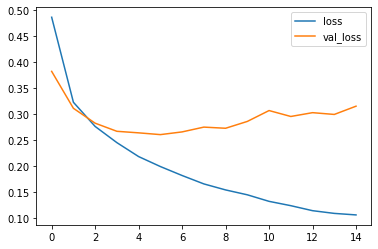

In [10]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

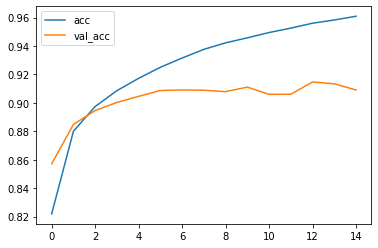

In [11]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

 38/313 [==>...........................] - ETA: 0s

2022-06-02 18:15:29.186262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[803   2  19  14   2   1 154   0   5   0]
 [  2 979   0  10   4   0   3   0   2   0]
 [ 11   1 863   4  51   0  70   0   0   0]
 [ 14   9  13 900  35   0  29   0   0   0]
 [  0   0  54  18 874   1  53   0   0   0]
 [  0   0   0   0   0 985   0  11   0   4]
 [ 52   1  57  18  70   1 797   0   4   0]
 [  0   0   0   0   0  15   0 979   0   6]
 [  6   0   3   3   8   4   9   4 963   0]
 [  1   0   0   0   0   7   0  44   0 948]]


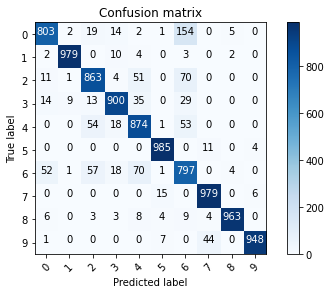

In [12]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [13]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

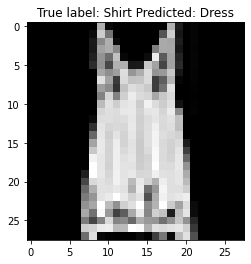

In [14]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));